In [87]:
# Import packages we'll need later on in this tutorial
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import math

# Import BW25 packages. You'll notice the packages are imported individually, unlike a one-and-done import with BW2.
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa
import brightway2 as bw 
from bw2calc import LeastSquaresLCA 

In [88]:
# If you're just starting out, this should only have "default" in it.
# Else, you'll see all the previous projects you've worked on.

bd.projects

Brightway2 projects manager with 9 objects:
	Assorted bellpepers
	Assorted pineapples
	Mango
	Mixed veggies :)
	RA - Ofir & Stine
	RA - Ofir & Stine 1
	RA - Rune
	RA - copy
	default
Use `projects.report()` to get a report on all projects.

In [89]:
# Your name variable should be the name of the project.

name = "RA - Rune"
bd.projects.set_current(name)

In [90]:
bd.projects.dir

'C:\\Users\\ruw\\AppData\\Local\\pylca\\Brightway3\\RA-Rune.dadeb551ec3a6324d45ae4a97eba210d'

In [91]:
# If this is your first time using this BW25 project, this should be an empty dictionary! 
bd.databases

Databases dictionary with 7 object(s):
	Consequential
	Cut-off
	Cylinder
	DU Cut-off
	DU consequential final
	Pellet
	biosphere3

In [92]:
# If this is the first time you've set up the project, you need to install the biosphere flows.
# You do not need to run this subsequent times.

bi.bw2setup() ## THIS YIELDS AN ERROR AT THE MOMENT

Biosphere database already present!!! No setup is needed


In [93]:
# Import the path where your EI database is stored. 
# Note that the EI database must be unzipped and the path should end at the datasets folder.
ei_path = r"D:\UNI\MILJOETEK\4. semester\EcoInvent\ecoinvent 3.9.1_apos_ecoSpold02\datasets"
# You will also need to give your database a name. This name will appear when you call bd.databases.
# Here, I am using EI v3.9.1 cutoff.
ei_name = "APOS EcoInevnt"

In [94]:
ei_path_consq = r"D:\UNI\MILJOETEK\4. semester\EcoInvent\ecoinvent 3.9.1_consequential_ecoSpold02\datasets"
ei_name_consq = "Consq Ecoinvent"

In [95]:
# # When we execute this cell, we will check if it's already been imported, and if not (else) we import it.

# if ei_name in bd.databases:
#     print("Database has already been imported.")
# else:
# # Go ahead and import:
#     ei_importer = bi.SingleOutputEcospold2Importer(ei_path, ei_name)
#     # Apply stragegies 
#     ei_importer.apply_strategies()
#     # We can get some statistics
#     ei_importer.statistics()
#     # Now we will write the database into our project. 
#     ei_importer.write_database()

In [96]:
eidb = bd.Database("DU consequential final")
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb), len(eidb)))


The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 31.


In [97]:
# process_name = "PP sheet sc2"
# process_name = "PP sheet sc2"
process_names = ["sc1 - No DU",
                 "sc2 - CDU", 
                 "sc3 - MDU"]
matches = [0] * len(process_names)
for p in range(len(process_names)):
    matches[p] = [act for act in eidb if process_names[p].lower() in act['name'].lower()]

# Select the first match (or whichever is most appropriate)
if matches:
    selected_process = matches  # If there are multiple matches, you can choose another index
    print("Selected process:",len(matches))
else:
    print("No process found with the name:", process_names)

matches

Selected process: 3


[['sc1 - No DU' (unit, GLO, None)],
 ['sc2 - CDU' (unit, GLO, None)],
 ['sc3 - MDU' (unit, GLO, None)]]

In [98]:
list(bw.methods)

#or use the built-in method
#bw.methods.list

#or the following
#bw.methods.items()

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'energy resources: non-renewable no LT',
  'abiotic depletion potential (ADP): fossil fuels no LT'),
 ('CML v4.8 2016 no LT',
  'eutrophication no LT',
  'eutrophication (fate not incl.) no LT'),
 ('CML v4.8 2016 no LT',
  'human toxicity no LT',
  'human toxicity (HTP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'material resources: metals/minerals no LT',
  'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')

In [99]:
# List all methods containing 'EF v3.1 EN15804'
all_methods = [m for m in bw.methods if 'EF v3.1 EN15804' in str(m)]

# Filter out methods that contain "climate change:" in method[1]
filtered_methods = [method for method in all_methods if "climate change:" not in method[1]]

# Print the methods that were removed
removed_methods = [method[1] for method in all_methods if "climate change:" in method[1]]
print("Removed methods:")
for rm in removed_methods:
    print(rm)

# Optional: Check the length of the filtered list
print(f"Total number of methods after filtering: {len(filtered_methods)}")



Removed methods:
climate change: biogenic
climate change: fossil
climate change: land use and land use change
Total number of methods after filtering: 16


In [100]:
plot_x_axis = [0] * len(filtered_methods)
for i in range(len(plot_x_axis)):
    plot_x_axis[i] = filtered_methods[i][1]
    print(filtered_methods[i][1])


acidification
climate change
ecotoxicity: freshwater
energy resources: non-renewable
eutrophication: freshwater
eutrophication: marine
eutrophication: terrestrial
human toxicity: carcinogenic
human toxicity: non-carcinogenic
ionising radiation: human health
land use
material resources: metals/minerals
ozone depletion
particulate matter formation
photochemical oxidant formation: human health
water use


In [128]:
FU = [0] * len(matches)
# FU = {}
for i in range(len(matches)):
    FU[i] = {matches[i][0]:1}

FU

[{'sc1 - No DU' (unit, GLO, None): 1},
 {'sc2 - CDU' (unit, GLO, None): 1},
 {'sc3 - MDU' (unit, GLO, None): 1}]

In [129]:
# Define the dimensions
n = len(process_names)  # number of rows
m = len(filtered_methods) # number of columns

# Create a DataFrame with random data
df = pd.DataFrame(0, index=process_names, columns=[filtered_methods])
df.head()


,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
sc1 - No DU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sc2 - CDU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sc3 - MDU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
from collections import defaultdict

def top_processes_by_name(lca):
    names = defaultdict(list)

    for flow in eidb:
        if flow.key in lca.activity_dict:
            names[flow['name']].append(
                lca.characterized_inventory[:, lca.activity_dict[flow.key]].sum()
            )
    
    return sorted(
        [(sum(scores), name) for name, scores in names.items()], 
        reverse=True
    )

In [151]:
n

3

In [153]:
calc_count = 1
top_process_list = [] * n

for impact in range(m):
    for idx  in range(n):
        fu = FU[idx]
        cat = filtered_methods[impact]
        lca = bw.LCA(fu, cat)
        lca.lci()
        lca.lcia()
        df.iat[idx, impact] = lca.score
        
        print(f"Calculation {calc_count} of {m*n}", FU, cat, lca.score)
        calc_count +=1

df.head()

Calculation 1 of 48 [{'sc1 - No DU' (unit, GLO, None): 1}, {'sc2 - CDU' (unit, GLO, None): 1}, {'sc3 - MDU' (unit, GLO, None): 1}] ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.012589529978108594
Calculation 2 of 48 [{'sc1 - No DU' (unit, GLO, None): 1}, {'sc2 - CDU' (unit, GLO, None): 1}, {'sc3 - MDU' (unit, GLO, None): 1}] ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.0570636745732585
Calculation 3 of 48 [{'sc1 - No DU' (unit, GLO, None): 1}, {'sc2 - CDU' (unit, GLO, None): 1}, {'sc3 - MDU' (unit, GLO, None): 1}] ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.10587594380568502
Calculation 4 of 48 [{'sc1 - No DU' (unit, GLO, None): 1}, {'sc2 - CDU' (unit, GLO, None): 1}, {'sc3 - MDU' (unit, GLO, None): 1}] ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 231.5037010492036
Calculation 5 of 48 [{'sc1 - No DU' (unit, GLO, None): 1}, {'sc2 - CDU' (unit, GLO, None): 1}, {'sc3 - MDU' (unit, GLO,

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
sc1 - No DU,0.012590,231.503701,18.263715,53.342227,0.001044,0.005892,0.034165,1.708624e-09,4.570222e-08,0.477288,33.408031,0.000040,1.897795e-07,7.566991e-08,0.008352,4.903269
sc2 - CDU,0.057064,47.723102,20.277983,56.021590,0.001163,0.006221,0.038681,2.206014e-09,4.026652e-08,0.501163,64.330009,0.000067,1.981802e-07,1.241516e-07,0.012239,4.981697
sc3 - MDU,0.105876,47.894743,23.576949,58.913770,0.001372,0.006167,0.036754,2.554843e-09,3.065905e-08,0.530660,46.998120,0.000107,2.094907e-07,1.574006e-07,0.015346,5.050826


In [154]:
# determining the name of the file
file_name = r'C:\Users\ruw\Desktop\RA\Results\Potato.xlsx'
sheet_name = 'Potato'
# creating an ExcelWriter object
with pd.ExcelWriter(file_name) as writer:
    # writing to the 'Employee' sheet
    df.to_excel(writer, sheet_name=sheet_name, index=True)
print('DataFrames are written to Excel File successfully.')

DataFrames are written to Excel File successfully.


In [155]:
df_cols = df.columns
df_cols = df_cols.to_list()


In [156]:

df_norm = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
for i in df_cols:
    scaling_factor = max(abs(df[i]))
    for j in range(len(df[df_cols[0]])):
        df_norm[i][j] =df[i][j]/scaling_factor
        #print(scaling_factor, i)
# for j in range(len(data['Index'])):
#     df_norm['Index'][j] = df['Index'][j]


# Selecting the columns from 1th column onwards
columns_to_plot = df_norm.columns
df_norm.head(6)

C:\Users\ruw\AppData\Local\Temp\2\ipykernel_30932\1482910106.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_norm[i][j] =df[i][j]/scaling_factor
C:\Users\ruw\AppData\Local\Temp\2\ipykernel_30932\1482910106.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignmen

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
sc1 - No DU,0.118908,1.000000,0.774643,0.905429,0.761061,0.947096,0.883249,0.668779,1.000000,0.899425,0.519323,0.376252,0.905909,0.480747,0.544238,0.970786
sc2 - CDU,0.538967,0.206144,0.860077,0.950908,0.847188,1.000000,1.000000,0.863464,0.881063,0.944416,1.000000,0.628453,0.946010,0.788762,0.797549,0.986313
sc3 - MDU,1.000000,0.206885,1.000000,1.000000,1.000000,0.991333,0.950195,1.000000,0.670844,1.000000,0.730578,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
# cmap = plt.get_cmap('tab20b')
# colors = [cmap(i) for i in np.linspace(0, 1, 20)]

colors = ["#789D4A",
          "#E07E3C",
          "#7A6040",
          "#E1BBB4",
          "#D05A57",
          "#F2C75C",
          "#DDCBA4",
          "#AEB862",
          "#000000"]

In [158]:
index_list = list(df.index.values)
index_list

['sc1 - No DU', 'sc2 - CDU', 'sc3 - MDU']

In [159]:
f = columns_to_plot[1]

In [160]:
print(len(columns_to_plot),len(filtered_methods))

16 16


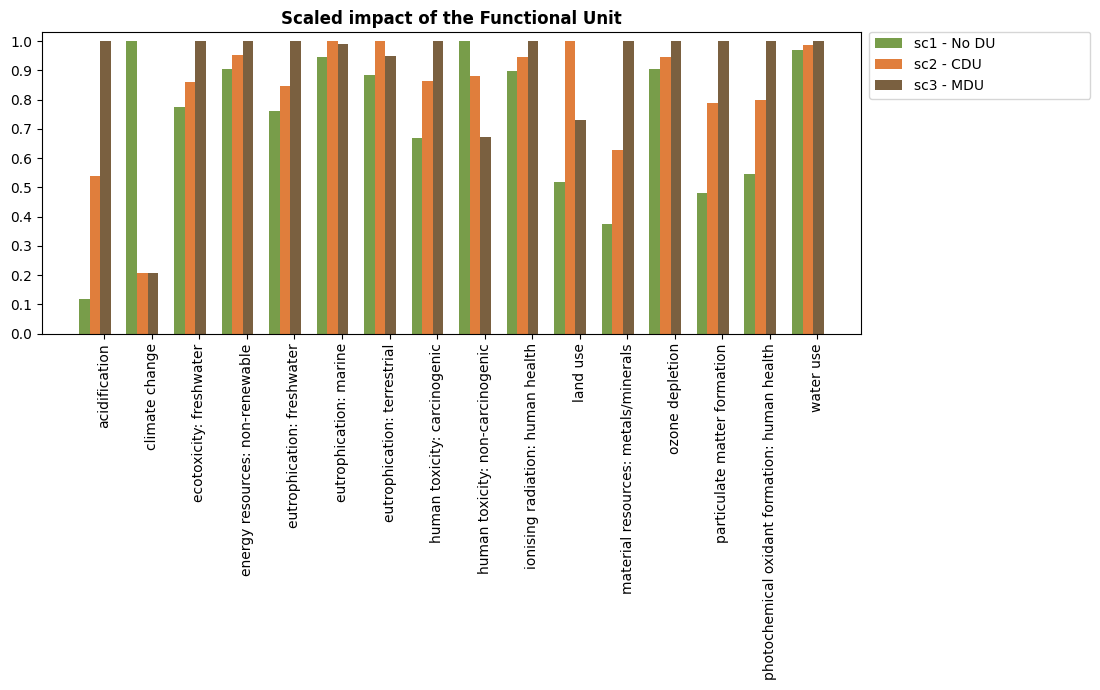

In [161]:


# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_norm)
bar_width = 1/(len(index_list) + 1.5) 
index = np.arange(len(columns_to_plot))



count = 3

# Plotting each group of bars
for i, process in enumerate(df_norm.index):
    values = df_norm.loc[process, columns_to_plot].values
    ax.bar((index + i * bar_width)-0.2, values, bar_width, label=process, color=colors[i])
    count += 3
    

# Setting labels and title
ax.set_title('Scaled impact of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(plot_x_axis)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

ax.legend(index_list,bbox_to_anchor=(1.01, .78, .27, 0), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [162]:
file = r'D:\UNI\MILJOETEK\4. semester\Calculations - Copy\LCIA FU_.xlsx'

sheet2 = 'Norm + Weigh'

data_NW = pd.read_excel(file, sheet_name=sheet2)


In [163]:
norm_lst = data_NW['Normalization']
weigh_lst = data_NW['Weighting'].to_list
print(len(data_NW['Normalization']))

norm_lst = [0]*(len(data_NW['Normalization']))
weigh_lst = [0]*(len(data_NW['Weighting']))

for i in range(len(data_NW['Normalization'])):
    norm_lst[i] = data_NW['Normalization'][i]
    weigh_lst[i] = data_NW['Weighting'][i]



16


In [164]:
norm_df = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
weigh_df = pd.DataFrame().reindex_like(df)

counter = 0
for i in df_cols:
    for j in range(len(df[df_cols[0]])):
        norm_df[i][j] =df[i][j] * norm_lst[counter]
        weigh_df[i][j] =norm_df[i][j] * weigh_lst[counter]
        #print(i, norm_df[i][j], weigh_df[i][j])
    counter +=1

lst = [0] * len(weigh_df[df_cols[0]])
for j in range(len(weigh_df[df_cols[0]])):
    for i in df_cols:
        lst[j] += weigh_df[i][j]
        #print(i,j)



C:\Users\ruw\AppData\Local\Temp\2\ipykernel_30932\2599739618.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm_df[i][j] =df[i][j] * norm_lst[counter]
C:\Users\ruw\AppData\Local\Temp\2\ipykernel_30932\2599739618.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assi

In [165]:
lst_scaled = [0] * len(lst)
lst_max = max(lst)


for n in range(len(lst)):
    lst_scaled[n] = lst[n]/lst_max

lst_scaled

[1.0, 0.25090052716203504, 0.26904473976115506]

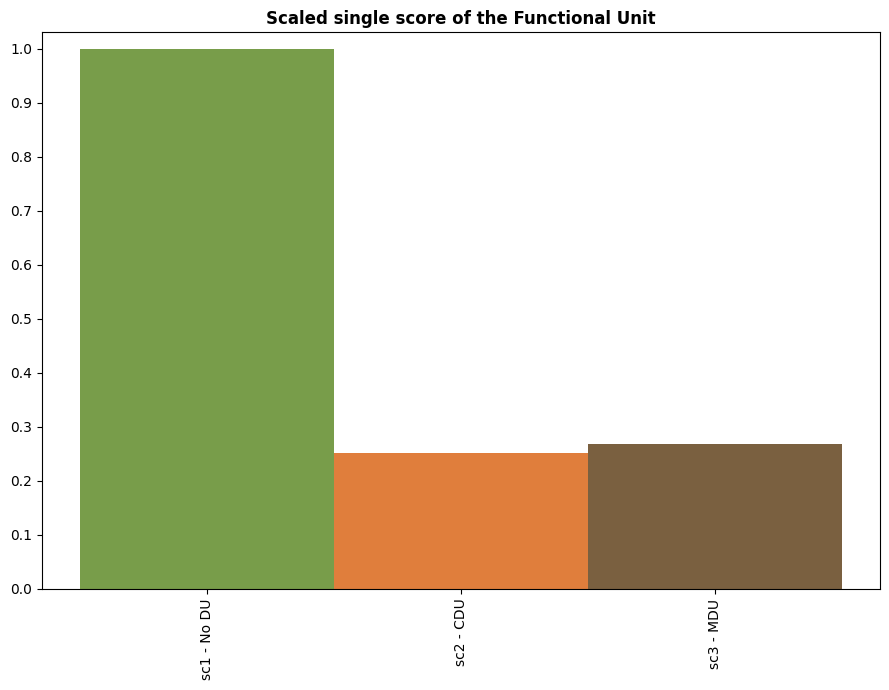

In [166]:


# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_norm)
bar_width = 1/(len(index_list)-4) 
index = np.arange(len(index_list))


# # Plotting each group of bars
# for i, process in enumerate(df_norm.index):
#     values = df_norm.loc[process, columns_to_plot].values
#     ax.bar((index + i * bar_width)-0.2, values, bar_width, label=process, color=colors[i])

# for j in range(len(lst_scaled)):
#     ax.bar((index + j * bar_width), lst_scaled[j], bar_width, label=index_list[j], color=colors[j])
   

ax.bar(index + bar_width, lst_scaled, bar_width, label=index_list, color=colors)

# Setting labels and title
ax.set_title('Scaled single score of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(index_list)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

# ax.legend(index_list,bbox_to_anchor=(1.01, .57, .27, 0), loc="lower left",
#             mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

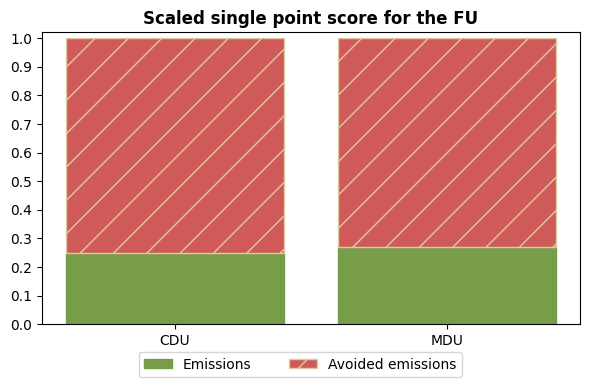

In [179]:
# Calculate bottom and top parts
bottoms = lst_scaled[1:]
last_value = lst_scaled[0]
tops = [last_value - bottom for bottom in bottoms]

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

# Bar positions
bar_positions = [0, 1]

# Bottom parts (first two values)
ax.bar(bar_positions, bottoms, label='Emissions',color=colors[0], edgecolor=colors[0])

# Top parts (values after subtraction) with hatching
ax.bar(bar_positions, tops, bottom=bottoms, label='Avoided emissions', color=colors[4], edgecolor=colors[6], hatch='/')


# Adding labels and titlecolors[1]
ax.set_xticks(bar_positions)
ax.set_xticklabels(['CDU', 'MDU'])

# Setting labels and title
ax.set_title('Scaled single point score for the FU',weight='bold')
plt.yticks(np.arange(0, 1.02, step=0.1))
plt.ylim(0, 1.02)

ax.legend(['Emissions', 'Avoided emissions'], bbox_to_anchor=(0.18, -0.18, 0.6, 0.2), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=2)

# ax.plot(bottoms,'o',color=colors[1])
# Show the plot
plt.tight_layout()
#plt.savefig(os.path.join(save_dir, 'GWP_res.jpg'), bbox_inches='tight')
plt.show()

In [168]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_processes(lca, limit=5) #returns a list of tuples: (lca score, supply amount, activity name)

[(2.789317582747072,
  1.2739264905124514,
  'air separation, cryogenic' (kilogram, RER, None)),
 (0.6976121514917811,
  0.29857397874199504,
  'ammonia production, steam reforming, liquid' (kilogram, RER w/o RU, None)),
 (0.593185977411367,
  0.25388017830672444,
  'ammonia production, steam reforming, liquid' (kilogram, RU, None)),
 (0.3812737313472711,
  0.9545325852002406,
  'nitrous oxide production' (kilogram, RER, None)),
 (0.06340707164041705,
  0.05052070093348738,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, NO, None))]

In [169]:
from collections import defaultdict

def top_emissions_by_name(lca, biosphere_database='biosphere3'):
    names = defaultdict(list)

    for flow in bw.Database("biosphere3"):
        if flow.key in lca.biosphere_dict:
            names[flow['name']].append(
                lca.characterized_inventory[lca.biosphere_dict[flow.key], :].sum()
            )
    
    return sorted(
        [(sum(scores), name) for name, scores in names.items()], 
        reverse=True
    )

In [170]:
top_emissions_by_name(lca)[:5]

[(5.050826144962069, 'Water'),
 (0.0, 'tau-Fluvalinate'),
 (0.0, 't-Butylamine'),
 (0.0, 't-Butyl methyl ether'),
 (0.0, 'o-Xylene')]

In [171]:
l = [t[0] for t in top_processes_by_name(lca)]
sum(l)

0.010446981368824791

In [172]:
lca.top_activities() #this command essentially relies on the annotated_top_process command from above. Hence, the output is given as (lca score, supply amount, activity name)

[(2.789317582747072,
  1.2739264905124514,
  'air separation, cryogenic' (kilogram, RER, None)),
 (0.6976121514917811,
  0.29857397874199504,
  'ammonia production, steam reforming, liquid' (kilogram, RER w/o RU, None)),
 (0.593185977411367,
  0.25388017830672444,
  'ammonia production, steam reforming, liquid' (kilogram, RU, None)),
 (0.3812737313472711,
  0.9545325852002406,
  'nitrous oxide production' (kilogram, RER, None)),
 (0.06340707164041705,
  0.05052070093348738,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, NO, None)),
 (0.03439310874236501,
  0.027403315056082355,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, RoW, None)),
 (0.029878846184546226,
  0.23850006647862704,
  'electricity production, nuclear, pressure water reactor' (kilowatt hour, GB, None)),
 (0.022617846779898917,
  0.01802116772411157,
  'electricity production, hydro, reservoir, non-alpine region' (kilowatt hour, PT, None)),
 (0.02036960453511335,


In [173]:
ca.annotated_top_processes(lca)

[(2.789317582747072,
  1.2739264905124514,
  'air separation, cryogenic' (kilogram, RER, None)),
 (0.6976121514917811,
  0.29857397874199504,
  'ammonia production, steam reforming, liquid' (kilogram, RER w/o RU, None)),
 (0.593185977411367,
  0.25388017830672444,
  'ammonia production, steam reforming, liquid' (kilogram, RU, None)),
 (0.3812737313472711,
  0.9545325852002406,
  'nitrous oxide production' (kilogram, RER, None)),
 (0.06340707164041705,
  0.05052070093348738,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, NO, None)),
 (0.03439310874236501,
  0.027403315056082355,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, RoW, None)),
 (0.029878846184546226,
  0.23850006647862704,
  'electricity production, nuclear, pressure water reactor' (kilowatt hour, GB, None)),
 (0.022617846779898917,
  0.01802116772411157,
  'electricity production, hydro, reservoir, non-alpine region' (kilowatt hour, PT, None)),
 (0.02036960453511335,


In [174]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_processes(lca)

[(2.789317582747072,
  1.2739264905124514,
  'air separation, cryogenic' (kilogram, RER, None)),
 (0.6976121514917811,
  0.29857397874199504,
  'ammonia production, steam reforming, liquid' (kilogram, RER w/o RU, None)),
 (0.593185977411367,
  0.25388017830672444,
  'ammonia production, steam reforming, liquid' (kilogram, RU, None)),
 (0.3812737313472711,
  0.9545325852002406,
  'nitrous oxide production' (kilogram, RER, None)),
 (0.06340707164041705,
  0.05052070093348738,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, NO, None)),
 (0.03439310874236501,
  0.027403315056082355,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, RoW, None)),
 (0.029878846184546226,
  0.23850006647862704,
  'electricity production, nuclear, pressure water reactor' (kilowatt hour, GB, None)),
 (0.022617846779898917,
  0.01802116772411157,
  'electricity production, hydro, reservoir, non-alpine region' (kilowatt hour, PT, None)),
 (0.02036960453511335,


In [175]:
FU_dict = {}
for i in range(len(matches)):
    FU_dict[matches[i][0]] = 1

FU_dict

{'sc1 - No DU' (unit, GLO, None): 1,
 'sc2 - CDU' (unit, GLO, None): 1,
 'sc3 - MDU' (unit, GLO, None): 1}

In [176]:
keys_to_use = list(FU_dict.keys())  # Convert to list if not already a list
indices = [lca.activity_dict[key] for key in keys_to_use if key in lca.activity_dict]
result = lca.characterized_inventory[:, indices].sum()  # Now use indices in slicing
result

0.0

In [181]:
# lca.characterized_inventory[:,lca.activity_dict.get(FU_dict['sc1 - No DU'])]#.sum()

In [180]:
# If this is your first time using this BW25 project, this should be an empty dictionary! 
bd.databases

Databases dictionary with 7 object(s):
	Consequential
	Cut-off
	Cylinder
	DU Cut-off
	DU consequential final
	Pellet
	biosphere3